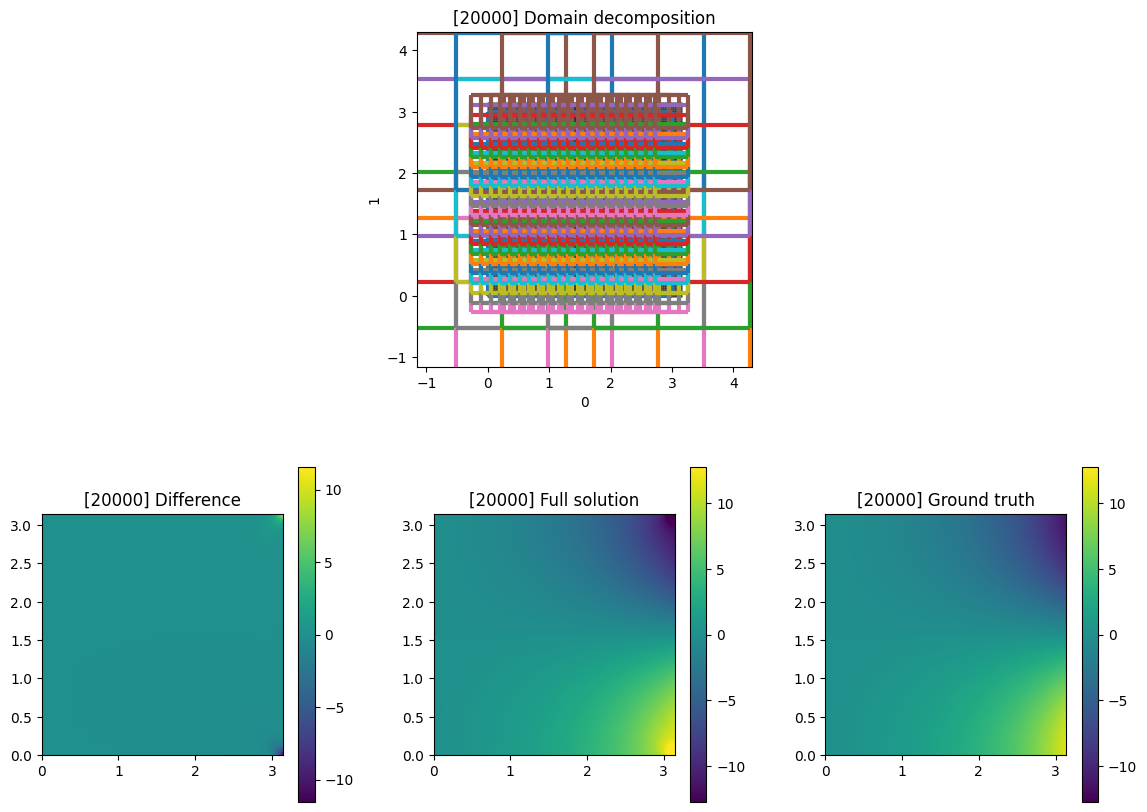

[INFO] 2024-12-05 06:01:46 - [i: 21000/100000] loss: 0.0309 rate: 303.7 elapsed: 0.03 hr test
[INFO] 2024-12-05 06:01:50 - [i: 22000/100000] loss: 0.0210 rate: 294.0 elapsed: 0.03 hr test
[INFO] 2024-12-05 06:01:54 - [i: 23000/100000] loss: 0.0185 rate: 293.9 elapsed: 0.03 hr test
[INFO] 2024-12-05 06:01:57 - [i: 24000/100000] loss: 0.0178 rate: 292.2 elapsed: 0.03 hr test


KeyboardInterrupt: 

In [1]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import Laplace2D_2
from fbpinns.decompositions import MultilevelRectangularDecompositionND
from fbpinns.networks import FCN
from fbpinns.schedulers import AllActiveSchedulerND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

pi = np.pi
XMIN, XMAX, YMIN, YMAX = 0, pi, 0, pi

w = 3.4
subdomain_xss = [[np.array([1.5]),np.array([1.5])]] +\
    [[np.linspace(0,3,n_),np.linspace(0,3,n_)] for n_ in (5,)] +\
    [[np.linspace(0,3,n_),np.linspace(0,3,n_)] for n_ in (20,)]
subdomain_wss = [[np.array([3.]),np.array([3.])]] +\
    [get_subdomain_ws(subdomain_xss[1], w)] +\
    [get_subdomain_ws(subdomain_xss[2], w)]

c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,0.]),
        xmax=np.array([pi,pi])
        ),
    problem=Laplace2D_2,
    problem_init_kwargs = dict(sd=0.1),
    decomposition=MultilevelRectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xss=subdomain_xss,
        subdomain_wss=subdomain_wss,
        unnorm=(0.,3.),
    ),
    network=FCN,
    network_init_kwargs = dict(
        layer_sizes = (2, 32, 1),
    ),
    optimiser_kwargs=dict(learning_rate=1e-3),
    scheduler = AllActiveSchedulerND,
    ns=((100,100),),
    n_test=(160,160),
    n_steps=100000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()